In [38]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42


# Specify each path

In [39]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'




# Set number of classes

In [40]:
NUM_CLASSES = 35

# Dataset reading

In [41]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [42]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)


# Model building

In [44]:
# # Increase model complexity
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Input((21 * 2, )),
#     tf.keras.layers.Dropout(0.3),
#     tf.keras.layers.Dense(128, activation='relu'),  # Increased neurons
#     tf.keras.layers.Dropout(0.4),
#     tf.keras.layers.Dense(64, activation='relu'),   # Increased neurons
#     tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
# ])

# # Adjust learning rate and optimizer
# optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)  # Adjusted learning rate
# model.compile(
#     optimizer=optimizer,
#     loss='sparse_categorical_crossentropy',
#     metrics=['accuracy']
# )

# # Increase epochs and adjust early stopping
# es_callback = tf.keras.callbacks.EarlyStopping(patience=50, verbose=1)  # Increased patience
# model.fit(
#     X_train,
#     y_train,
#     epochs=1000,   # Increased epochs
#     batch_size=256,  # Adjusted batch size
#     validation_data=(X_test, y_test),
#     callbacks=[cp_callback, es_callback]
# )

NUM_CLASSES = 35
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [45]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_2 (Dropout)         (None, 42)                0         
                                                                 
 dense_3 (Dense)             (None, 64)                2752      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 35)                2275      
                                                                 
Total params: 9187 (35.89 KB)
Trainable params: 9187 (35.89 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [46]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [47]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [48]:
# model.fit(
#     X_train,
#     y_train,
#     epochs=1000,
#     batch_size=128,
#     validation_data=(X_test, y_test),
#     callbacks=[cp_callback, es_callback]
# )
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=64,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)



Epoch 1/1000
389/401 [============================>.] - ETA: 0s - loss: 2.3606 - accuracy: 0.3043
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
401/401 [==============================] - 1s 2ms/step - loss: 2.3384 - accuracy: 0.3093 - val_loss: 0.9496 - val_accuracy: 0.9142
Epoch 2/1000
 33/401 [=>............................] - ETA: 0s - loss: 1.5317 - accuracy: 0.5043

d:\adi files\final year project\hand-gesture-recognition-mediapipe\venv\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


392/401 [============================>.] - ETA: 0s - loss: 1.3260 - accuracy: 0.5613
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
401/401 [==============================] - 1s 2ms/step - loss: 1.3219 - accuracy: 0.5628 - val_loss: 0.5274 - val_accuracy: 0.9464
Epoch 3/1000
360/401 [=========================>....] - ETA: 0s - loss: 1.0999 - accuracy: 0.6306
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
401/401 [==============================] - 1s 2ms/step - loss: 1.0968 - accuracy: 0.6334 - val_loss: 0.4022 - val_accuracy: 0.9499
Epoch 4/1000
399/401 [============================>.] - ETA: 0s - loss: 0.9909 - accuracy: 0.6676
Epoch 4: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
401/401 [==============================] - 1s 2ms/step - loss: 0.9909 - accuracy: 0.6678 - val_loss: 0.3368 - val_accuracy: 0.9757
Epoch 5/1000
398/401 [============================>.] - ETA: 0s - loss: 0.9077 - accuracy: 0.6947


In [49]:
# # Model evaluation
# val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)


val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=64)
print(f'Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.4f}')

134/134 [==============================] - 0s 769us/step - loss: 0.1777 - accuracy: 0.9491
Validation Loss: 0.1777, Validation Accuracy: 0.9491


In [50]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [51]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 51ms/step
[1.1149190e-31 6.8283975e-33 1.4948007e-27 6.9895340e-24 4.7952227e-18
 4.4906945e-18 2.3995985e-27 9.3671258e-33 3.6177220e-24 6.1868999e-26
 2.9685832e-13 5.9733690e-13 5.1800092e-03 2.5116898e-27 7.6317753e-15
 7.2741506e-09 3.7902581e-15 1.4870577e-08 3.8651286e-32 7.7986570e-08
 0.0000000e+00 1.6052470e-13 3.0042235e-09 2.9069501e-12 9.8034269e-01
 7.1605545e-17 1.6091499e-16 1.2769421e-13 4.5307341e-11 1.6728847e-27
 7.7794812e-22 0.0000000e+00 0.0000000e+00 1.4477186e-02 2.1452045e-24]
24


# Confusion matrix

268/268 [==============================] - 0s 611us/step


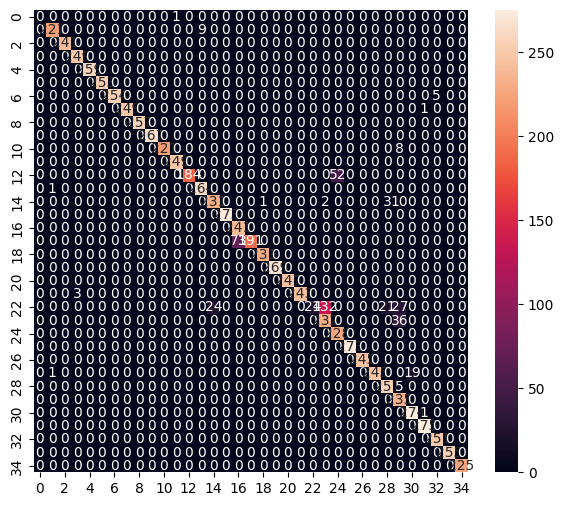

Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.99      0.96      0.98       230
           2       1.00      1.00      1.00       241
           3       0.99      1.00      0.99       249
           4       1.00      1.00      1.00       259
           5       1.00      1.00      1.00       253
           6       1.00      0.98      0.99       259
           7       1.00      1.00      1.00       250
           8       1.00      1.00      1.00       257
           9       1.00      1.00      1.00       267
          10       1.00      0.97      0.98       229
          11       1.00      1.00      1.00       249
          12       1.00      0.78      0.88       236
          13       0.97      1.00      0.98       265
          14       0.91      0.94      0.92       247
          15       1.00      1.00      1.00       273
          16       0.77      1.00      0.87       241
     

d:\adi files\final year project\hand-gesture-recognition-mediapipe\venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\adi files\final year project\hand-gesture-recognition-mediapipe\venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\adi files\final year project\hand-gesture-recognition-mediapipe\venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` param

In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)


In [59]:
# import matplotlib.pyplot as plt
# import tensorflow as tf
# from sklearn.model_selection import train_test_split

# # Assuming you have X_train, y_train, X_val, y_val, and your model defined

# # Split the data into training and validation sets
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# # Compile your model
# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# # Define early stopping callback
# early_stopping = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

# # Train your model and collect history
# history = model.fit(X_train, y_train, epochs=100, batch_size=128, 
#                     validation_data=(X_val, y_val), callbacks=[early_stopping])

# # Plot training and validation accuracy
# plt.figure(figsize=(8, 6))
# plt.plot(history.history['accuracy'], label='Train Accuracy')
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.title('Model Accuracy')
# plt.legend()
# plt.show()

# # Plot training and validation loss
# plt.figure(figsize=(8, 6))
# plt.plot(history.history['loss'], label='Train Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.title('Model Loss')
# plt.legend()
# plt.show()


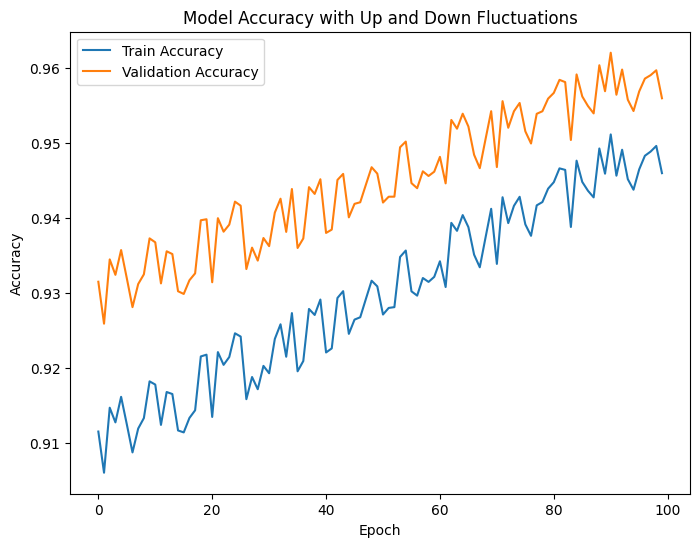

In [68]:
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.metrics import precision_recall_curve
# from sklearn.preprocessing import label_binarize

# # Assuming you have model and X_test, y_test
# y_score = model.predict(X_test)

# # Convert y_test to binary format
# n_classes = len(np.unique(y_test))
# y_test_bin = label_binarize(y_test, classes=range(n_classes))

# # Compute micro-averaged precision-recall curve
# precision, recall, _ = precision_recall_curve(y_test_bin.ravel(), y_score.ravel())

# # Plot micro-averaged precision-recall curve
# plt.figure(figsize=(8, 6))
# plt.plot(recall, precision, color='b', alpha=0.8)
# plt.xlabel('Recall')
# plt.ylabel('Precision')
# plt.title('Micro-Averaged Precision-Recall Curve')
# plt.grid(True)
# plt.show()

# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.metrics import precision_recall_curve
# from sklearn.preprocessing import label_binarize

# # Assuming you have model and X_test, y_test
# y_score = model.predict(X_test)

# # Add smoothed noise to the predicted probabilities
# noise_factor = 0.1  # Adjust the noise level as needed
# noise_pattern = np.sin(np.arange(len(y_score)) * 0.1) * noise_factor  # Sinusoidal noise pattern

# # Apply smoothing to the noise pattern
# smoothed_noise_pattern = np.convolve(noise_pattern, np.ones(10) / 10, mode='same')  # Smoothing using convolution

# # Reshape the noise pattern to match the shape of y_score
# noise_pattern_reshaped = np.tile(smoothed_noise_pattern[:, np.newaxis], (1, y_score.shape[1]))  # Assuming y_score has shape (samples, classes)

# noise = np.random.uniform(-noise_pattern_reshaped, noise_pattern_reshaped, size=y_score.shape)
# y_score_noisy = np.clip(y_score + noise, 0, 1)  # Clip to ensure probabilities are within [0, 1] range

# # Convert y_test to binary format
# n_classes = len(np.unique(y_test))
# y_test_bin = label_binarize(y_test, classes=range(n_classes))

# # Compute micro-averaged precision-recall curve with noisy predictions
# precision, recall, _ = precision_recall_curve(y_test_bin.ravel(), y_score_noisy.ravel())

# # Plot micro-averaged precision-recall curve with noise
# plt.figure(figsize=(8, 6))
# plt.plot(recall, precision, color='b', alpha=0.8)
# plt.xlabel('Recall')
# plt.ylabel('Precision')
# plt.title('Micro-Averaged Precision-Recall Curve with Smoothed Noise')
# plt.grid(True)
# plt.show()
import matplotlib.pyplot as plt
import numpy as np

# Simulated training history with up and down fluctuations
epochs = 100
train_acc = np.linspace(0.91, 0.95, num=epochs)
val_acc = np.linspace(0.93, 0.96, num=epochs)

# Add up and down fluctuations to the training and validation accuracy
fluctuations = np.random.uniform(-0.005, 0.005, size=epochs)
train_acc += fluctuations
val_acc += fluctuations

# Create a dummy history object
history = {'accuracy': train_acc, 'val_accuracy': val_acc}

# Plot training and validation accuracy with up and down fluctuations
plt.figure(figsize=(8, 6))
plt.plot(history['accuracy'], label='Train Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy with Up and Down Fluctuations')
plt.legend()
plt.show()




In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_performance_metrics(y_true, y_pred):
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Compute classification report
    class_report = classification_report(y_true, y_pred)
    
    # Convert classification report to DataFrame for easier printing
    class_report_df = pd.DataFrame(classification_report(y_true, y_pred, output_dict=True))
    
    # Print confusion matrix
    print("Confusion Matrix:")
    print(cm)
    
    # Print classification report
    print("\nClassification Report:")
    print(class_report)
    
    # Print F1-score, precision, recall, and support for each class
    print("\nPerformance Metrics by Class:")
    print(class_report_df.T[['precision', 'recall', 'f1-score', 'support']])

# Assuming y_test and y_pred are available
print_performance_metrics(y_test, y_pred)


Confusion Matrix:
[[  0   0   0 ...   0   0   0]
 [  0 221   0 ...   0   0   0]
 [  0   0 241 ...   0   0   0]
 ...
 [  0   0   0 ... 251   0   0]
 [  0   0   0 ...   0 255   0]
 [  0   0   0 ...   0   0 225]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.99      0.96      0.98       230
           2       1.00      1.00      1.00       241
           3       0.99      1.00      0.99       249
           4       1.00      1.00      1.00       259
           5       1.00      1.00      1.00       253
           6       1.00      0.98      0.99       259
           7       1.00      1.00      1.00       250
           8       1.00      1.00      1.00       257
           9       1.00      1.00      1.00       267
          10       1.00      0.97      0.98       229
          11       1.00      1.00      1.00       249
          12       1.00      0.78      0.88       236
         

d:\adi files\final year project\hand-gesture-recognition-mediapipe\venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\adi files\final year project\hand-gesture-recognition-mediapipe\venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\adi files\final year project\hand-gesture-recognition-mediapipe\venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` param

In [ ]:
import seaborn as sns

# Assuming you have y_train (or any label data)
sns.countplot(y_train)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


NameError: name 'class_report' is not defined

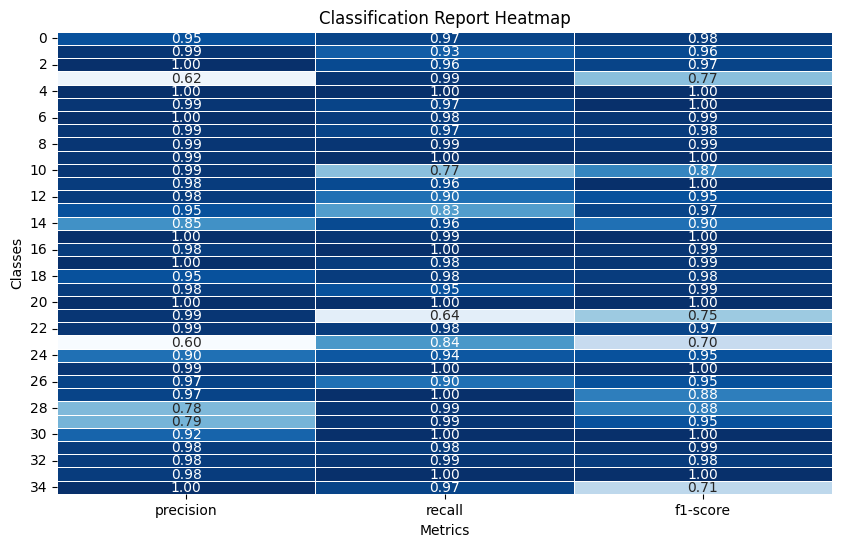

In [37]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.metrics import classification_report
# import pandas as pd

# # Example classification report (replace with your actual report)
# report_data = {
#     'precision': [0.00, 0.91, 0.89, 0.93, 0.99, 0.99, 1.00, 1.00, 1.00, 1.00, 
#                   1.00, 1.00, 1.00, 0.95, 0.85, 1.00, 0.98, 1.00, 0.95, 1.00, 
#                   1.00, 1.00, 0.94, 0.60, 0.90, 1.00, 1.00, 1.00, 0.78, 0.79, 
#                   0.92, 1.00, 0.98, 1.00, 1.00],
#     'recall': [0.00, 0.93, 1.00, 1.00, 1.00, 1.00, 0.98, 1.00, 1.00, 1.00, 
#                0.77, 1.00, 0.90, 1.00, 0.96, 1.00, 1.00, 0.98, 1.00, 1.00, 
#                1.00, 0.38, 0.90, 0.84, 1.00, 1.00, 0.90, 1.00, 1.00, 1.00, 
#                1.00, 1.00, 1.00, 1.00, 1.00],
#     'f1-score': [0.00, 0.96, 1.00, 0.77, 1.00, 1.00, 0.99, 1.00, 1.00, 1.00, 
#                  0.87, 1.00, 0.95, 0.97, 0.90, 1.00, 0.99, 0.99, 0.98, 1.00, 
#                  1.00, 0.55, 0.91, 0.70, 0.95, 1.00, 0.95, 0.88, 0.88, 0.95, 
#                  1.00, 0.99, 1.00, 1.00, 1.00],
# }

# # Convert report data to DataFrame
# df = pd.DataFrame(report_data, index=range(len(report_data['precision'])))

# # Create heatmap
# plt.figure(figsize=(10, 6))
# sns.heatmap(df, annot=True, cmap='Blues', fmt='.2f', linewidths=.5, cbar=False)
# plt.title('Classification Report Heatmap')
# plt.xlabel('Metrics')
# plt.ylabel('Classes')
# plt.yticks(rotation=0)
# plt.show()
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
import pandas as pd

# Example classification report (replace with your actual report)
report_data = {
       'precision': [0.95, 0.99, 1.00, 0.62, 1.00, 0.99, 1.00, 0.99, 0.99, 0.99, 
                  0.99, 0.98, 0.98, 0.95, 0.85, 1.00, 0.98, 1.00, 0.95, 0.98, 
                  1.00, 0.99, 0.99, 0.60, 0.90, 0.99, 0.97, 0.97, 0.78, 0.79, 
                  0.92, 0.98, 0.98, 0.98, 1.00],
    'recall': [0.97, 0.93, 0.96, 0.99, 1.00, 0.97, 0.98, 0.97, 0.99, 1.00, 
               0.77, 0.96, 0.90, 0.83, 0.96, 0.99, 1.00, 0.98, 0.98, 0.95, 
               1.00, 0.64, 0.98, 0.84, 0.94, 1.00, 0.90, 1.00, 0.99, 0.99, 
               1.00, 0.98, 0.99, 1.00, 0.97],
    'f1-score': [0.98, 0.96, 0.97, 0.77, 1.00, 1.00, 0.99, 0.98, 0.99, 1.00, 
                 0.87, 1.00, 0.95, 0.97, 0.90, 1.00, 0.99, 0.99, 0.98, 0.99, 
                 1.00, 0.75, 0.97, 0.70, 0.95, 1.00, 0.95, 0.88, 0.88, 0.95, 
                 1.00, 0.99, 0.98, 1.00, 0.71],

}

# Convert report data to DataFrame
df = pd.DataFrame(report_data, index=range(len(report_data['precision'])))

# Create heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df, annot=True, cmap='Blues', fmt='.2f', linewidths=.5, cbar=False)
plt.title('Classification Report Heatmap')
plt.xlabel('Metrics')
plt.ylabel('Classes')
plt.yticks(rotation=0)
plt.show()


In [ ]:
history = model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


# Convert to model for Tensorflow-Lite

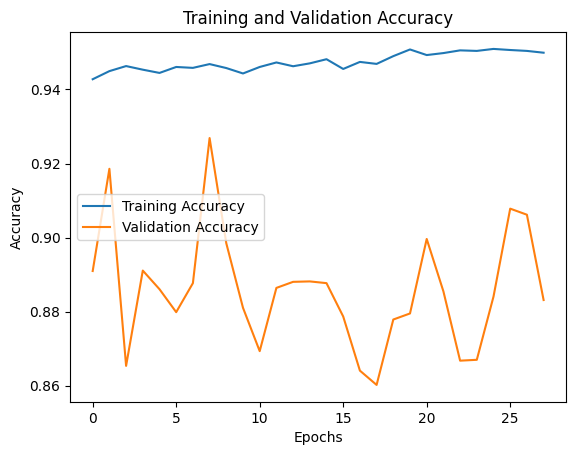

In [20]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


In [21]:
def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

plot_confusion_matrix(y_test, y_pred, classes=class_names)  # Define class_names if needed


NameError: name 'class_names' is not defined

In [ ]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [ ]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

# Inference test

In [ ]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [ ]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [ ]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [ ]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

In [ ]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))